<a href="https://colab.research.google.com/github/natryus/SVM-Classifier/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#importing dependencies
import pandas as pd
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
!cp /content/drive/MyDrive/valid.csv .

In [ ]:
# Check if dataset is present
import os.path
dataset_path = "./valid.csv"

os.path.isfile(dataset_path)

In [ ]:
dataset = pd.read_csv(dataset_path)
dataset.keys()
dataset

In [13]:
X = dataset[['x','y','prb_usage', 'targetTput',
       'throughput', 'rsrp', 'rsrq', 'rssinr',
       'rsrp_nb0', 'rsrq_nb0',
       'rssinr_nb0', 'rsrp_nb1', 'rsrq_nb1', 'rssinr_nb1', 'rsrp_nb2',
       'rsrq_nb2', 'rssinr_nb2', 'rsrp_nb3', 'rsrq_nb3', 'rssinr_nb3',
       'rsrp_nb4', 'rsrq_nb4', 'rssinr_nb4']]
y = dataset[['Anomaly']]

In [ ]:
X_scale = StandardScaler().fit_transform(X)
X.shape
X_scale

In [15]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3,random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5,random_state=42)


In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

In [ ]:
Y_train = np.ravel(Y_train)
Y_train.shape
Y_test = np.ravel(Y_test)
Y_test.shape

In [ ]:

# setting hyperparameters
k_range = range(1, 10)

# empty list to store scores
k_scores = []
cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=0)

print('\nCross-Validation...\n')
t0 = time()

# 1. we will loop through reasonable values of k
for k in k_range:
    svm = SVC(kernel='linear', C=k, gamma='auto')
    scores = cross_val_score(svm, X_scale, y, cv=cv, scoring='accuracy')
    k_scores.append(scores.mean())

    print("[%d] %0.4f (+/- %0.4f)" % (k, scores.mean(), scores.std() * 2) )


max_score = max(k_scores)
best_k = k_scores.index(max_score)+1

print("\nDone in %0.3fs" % (time() - t0))

print("\nBest C is %d, accuracy: %0.5f\n" % (best_k, max_score))


plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-validated accuracy')
plt.title("(SVM) Best C is %d, accuracy: %0.5f" % (best_k, max_score))
plt.scatter(best_k, max_score, s=80, facecolors='none', edgecolors='r')
plt.plot(k_range, k_scores)

In [ ]:
print(max_score)
print(k_scores)

In [ ]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": [1e3, 5e3, 1e4, 5e4, 1e5],
    "gamma": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}
clf = GridSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid)
clf = clf.fit(X_train, Y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set


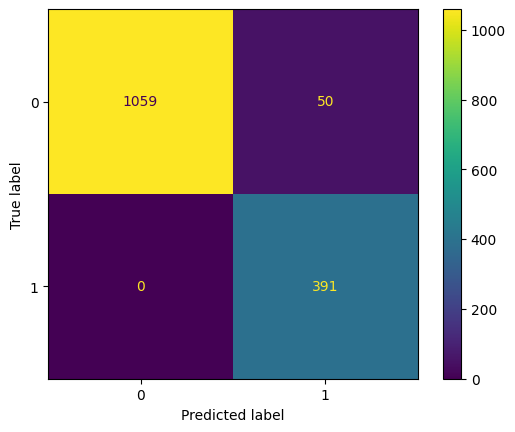

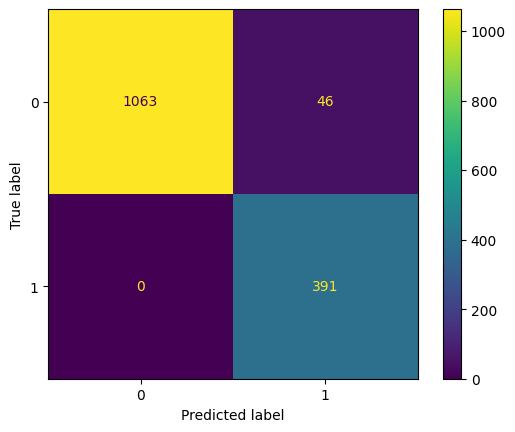

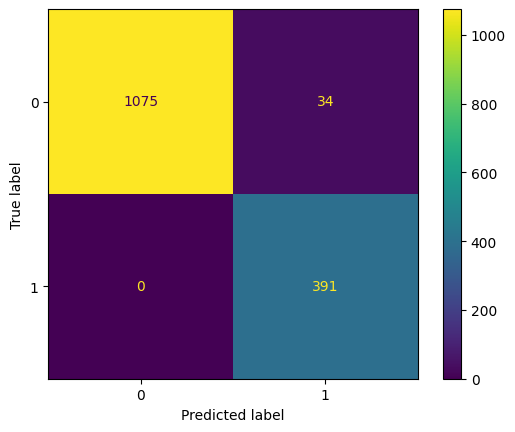

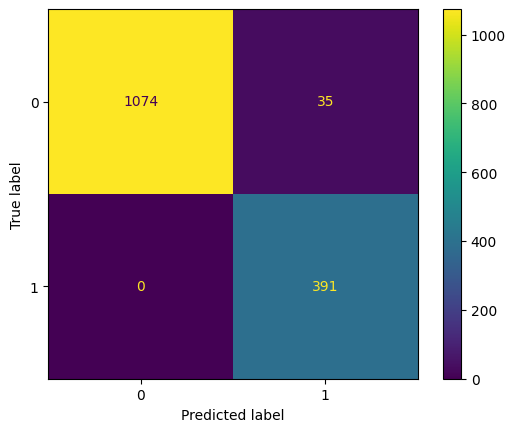

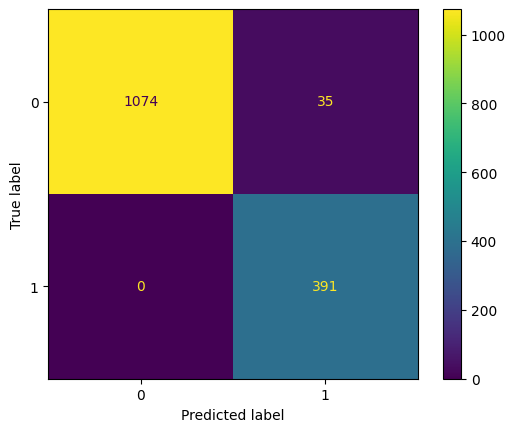

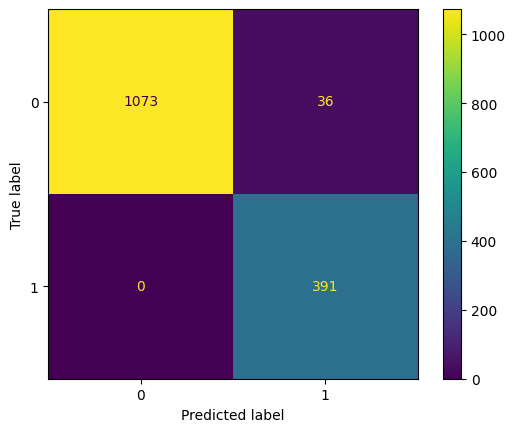

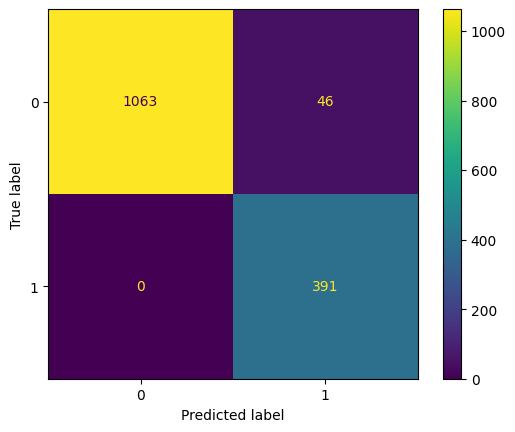

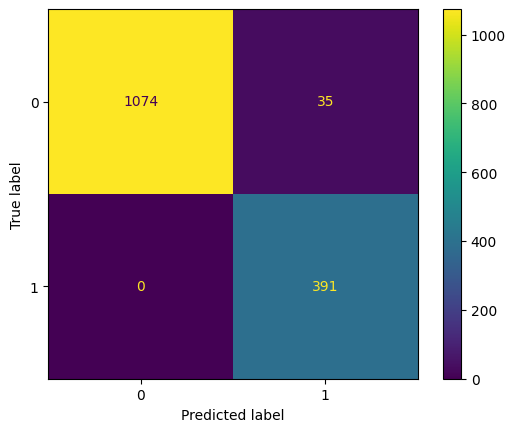

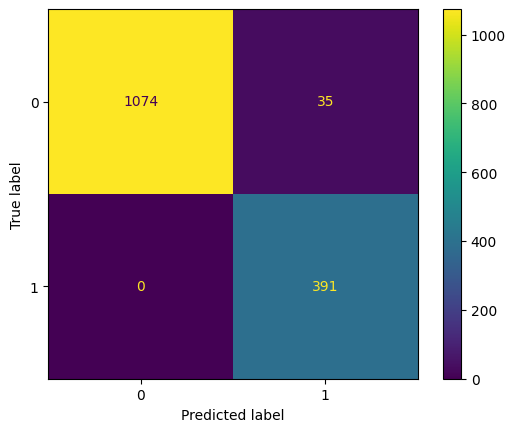

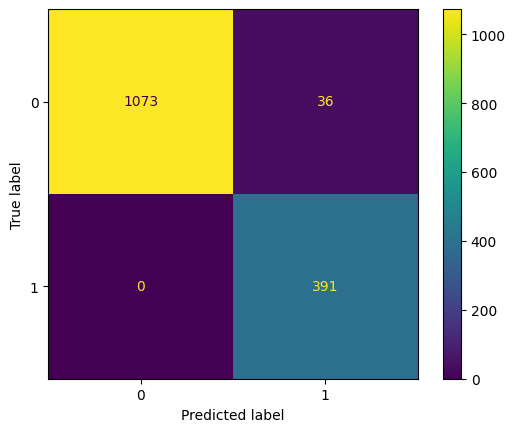

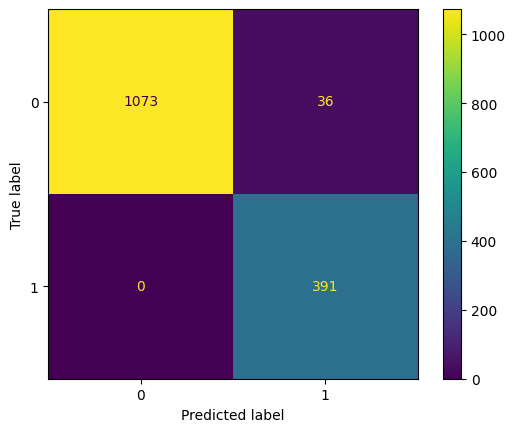

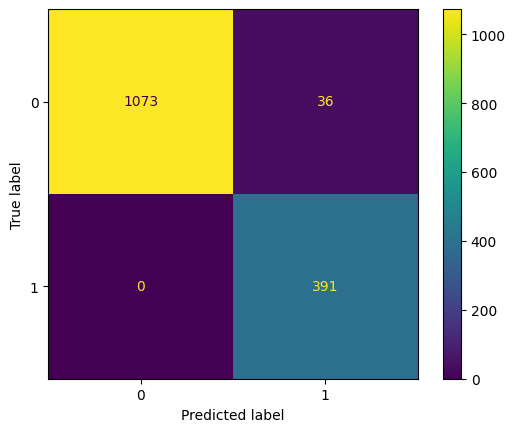

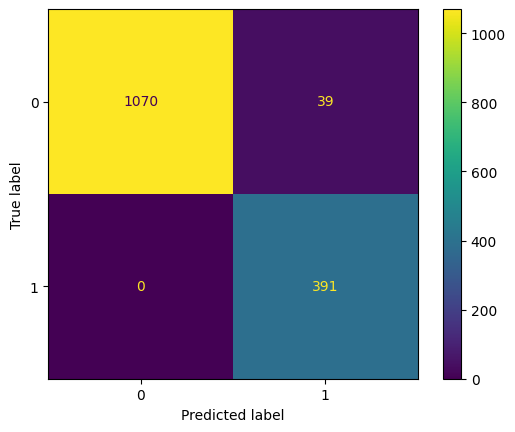

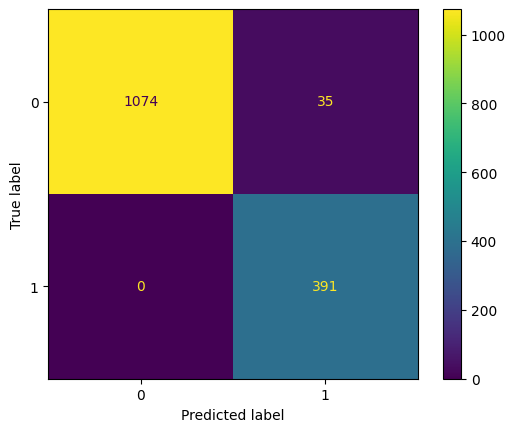

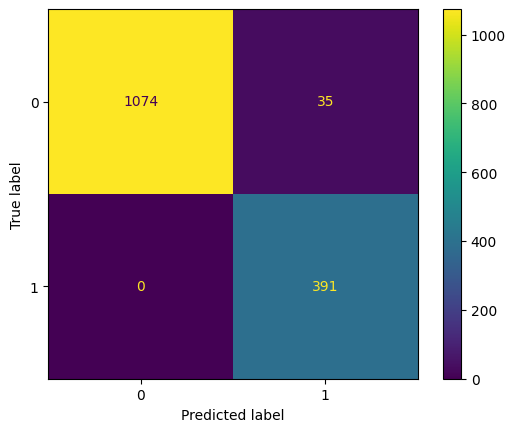

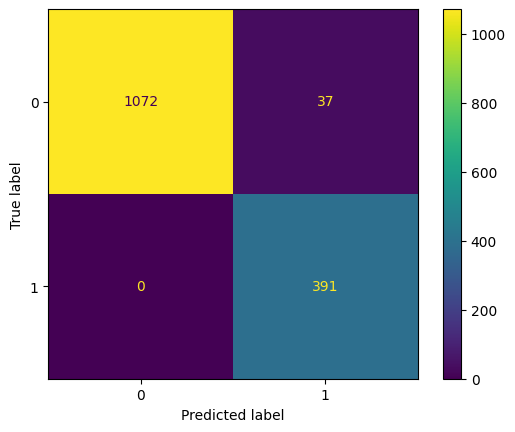

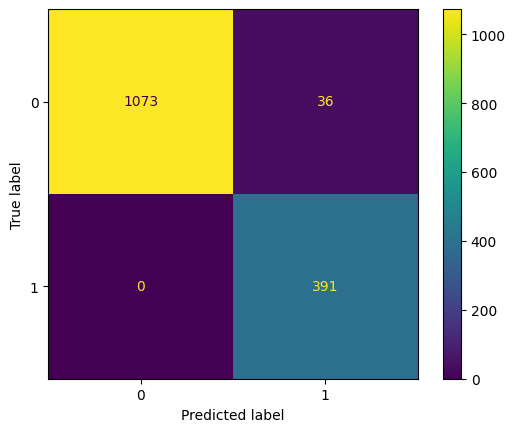

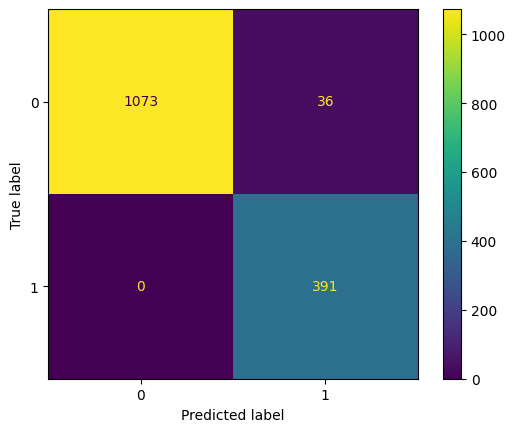

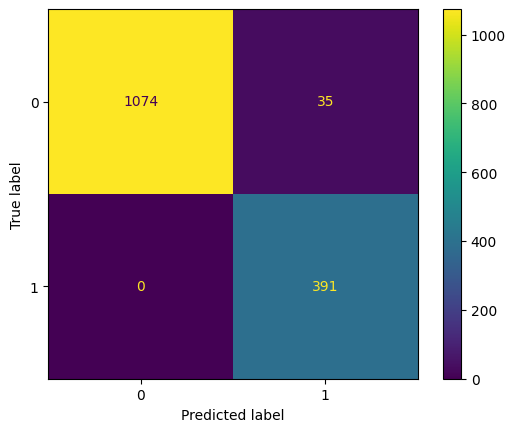

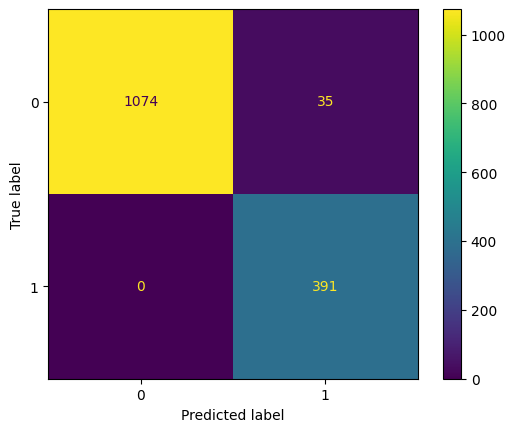

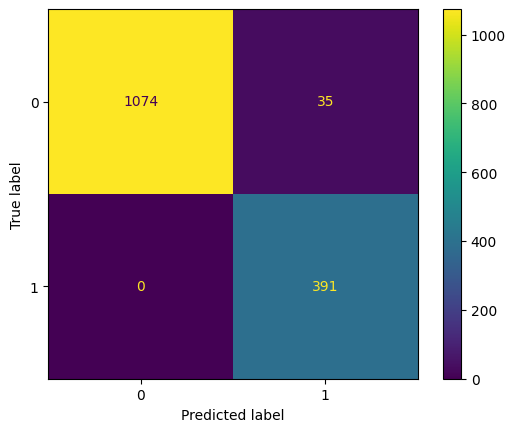

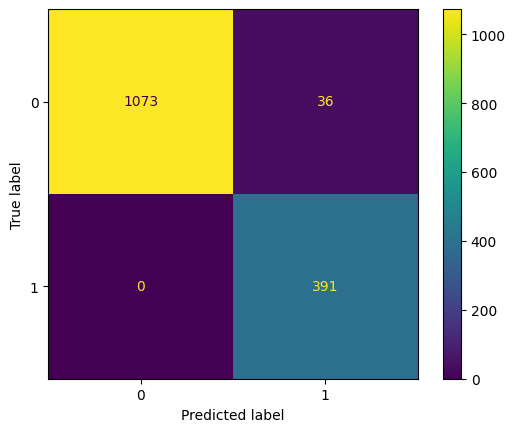

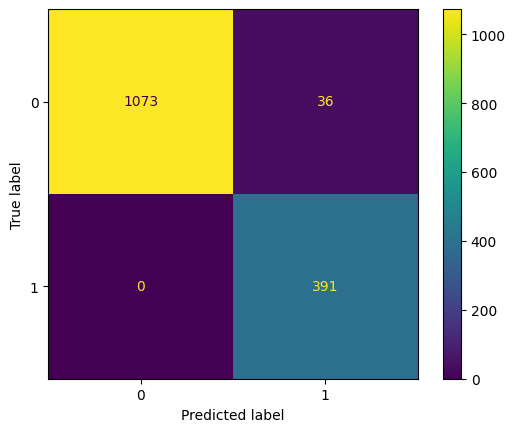

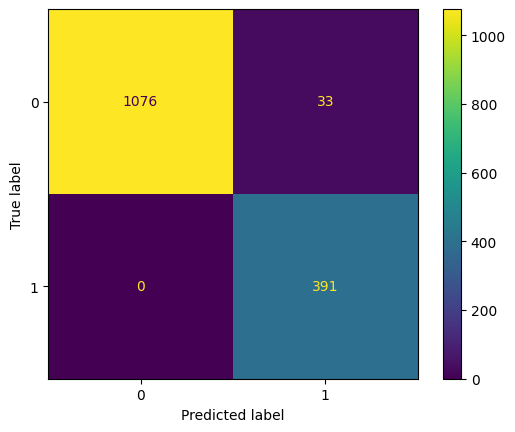

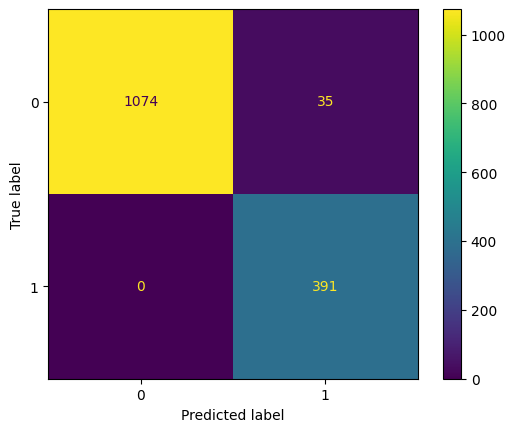

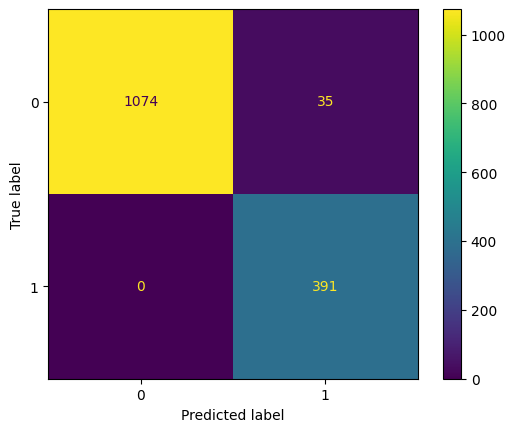

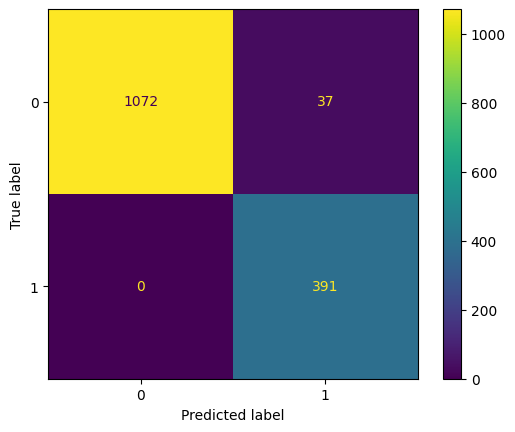

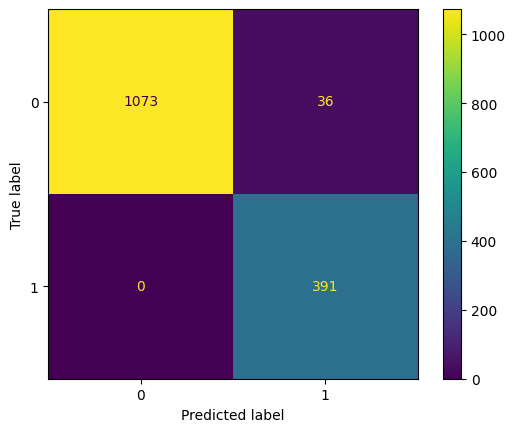

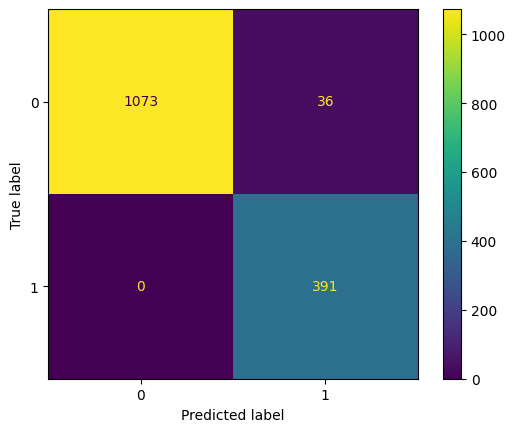

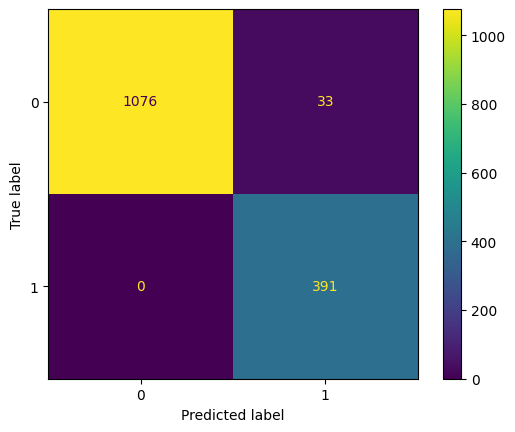

In [21]:

print("Fitting the classifier to the training set")
t0 = time()
for i in [1e3, 5e3, 1e4, 5e4, 1e5]:
  for j in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]:
    clf = SVC(kernel="rbf", class_weight="balanced", C=i,gamma=j)
    clf = clf.fit(X_train, Y_train)
    predictions = clf.predict(X_test)
    cm = confusion_matrix(Y_test, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
    disp.plot()

    plt.show()
